/var/folders/24/xt77wc793jqdpnbccww3s7h00000gn/T/ipykernel_3246/1051447088.py:22: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  axis.w_xaxis.set_pane_color(transparent)
/var/folders/24/xt77wc793jqdpnbccww3s7h00000gn/T/ipykernel_3246/1051447088.py:23: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  axis.w_yaxis.set_pane_color(transparent)
/var/folders/24/xt77wc793jqdpnbccww3s7h00000gn/T/ipykernel_3246/1051447088.py:24: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  axis.w_zaxis.set_pane_color(transparent)


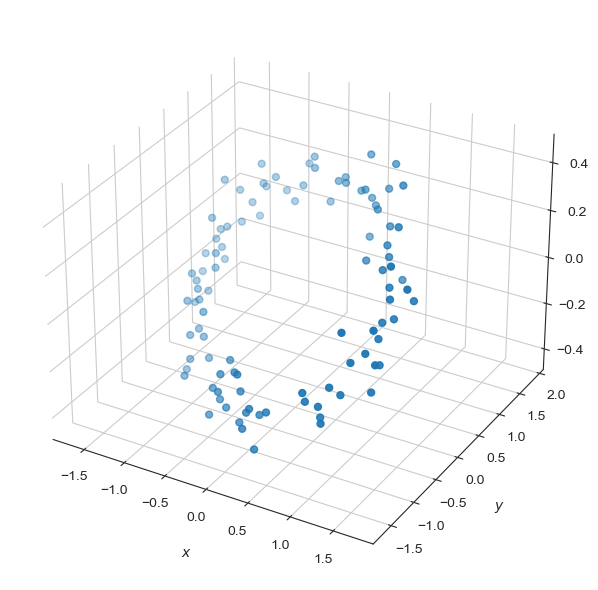

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy.linalg import inv, eig, svd
from numpy.random import uniform, randn, seed
from itertools import repeat
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # This line is added
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

sns.set_style('white')
seed(42)

def format3D(axis, labels=('x', 'y', 'z'), limits=None):
    """3D plot helper function to set labels, pane color, and axis limits"""
    axis.set_xlabel('\n${}$'.format(labels[0]), linespacing=3)
    axis.set_ylabel('\n${}$'.format(labels[1]), linespacing=3)
    axis.set_zlabel('\n${}$'.format(labels[2]), linespacing=3)
    transparent = (1.0, 1.0, 1.0, 0.0)
    axis.w_xaxis.set_pane_color(transparent)
    axis.w_yaxis.set_pane_color(transparent)
    axis.w_zaxis.set_pane_color(transparent)
    if limits:
        axis.set_xlim(limits[0])
        axis.set_ylim(limits[1])
        axis.set_zlim(limits[2])

# Create a noisy 3D Ellipse

# We illustrate the computation using a randomly generated three-dimensional ellipse with 100 data points.

n_points, noise = 100, 0.1
angles = uniform(low=-np.pi, high=np.pi, size=n_points)
x = 2 * np.cos(angles) + noise * randn(n_points)
y = np.sin(angles) + noise * randn(n_points)

theta = np.pi/4 # 45 degree rotation
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                            [np.sin(theta), np.cos(theta)]])

rotated = np.column_stack((x, y)).dot(rotation_matrix)
x, y = rotated[:, 0], rotated[:, 1]

z = .2 * x  + .2 * y + noise * randn(n_points)
data = np.vstack((x, y, z)).T

# Plot the result

fig = plt.figure()  # Changed from plt.figure().gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')  # Changed from plt.figure().gca(projection='3d')

ax.scatter(x, y, z, s=25)
format3D(ax)
plt.gcf().set_size_inches(14, 6)
plt.tight_layout()


/var/folders/24/xt77wc793jqdpnbccww3s7h00000gn/T/ipykernel_3246/1051447088.py:22: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  axis.w_xaxis.set_pane_color(transparent)
/var/folders/24/xt77wc793jqdpnbccww3s7h00000gn/T/ipykernel_3246/1051447088.py:23: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  axis.w_yaxis.set_pane_color(transparent)
/var/folders/24/xt77wc793jqdpnbccww3s7h00000gn/T/ipykernel_3246/1051447088.py:24: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  axis.w_zaxis.set_pane_color(transparent)


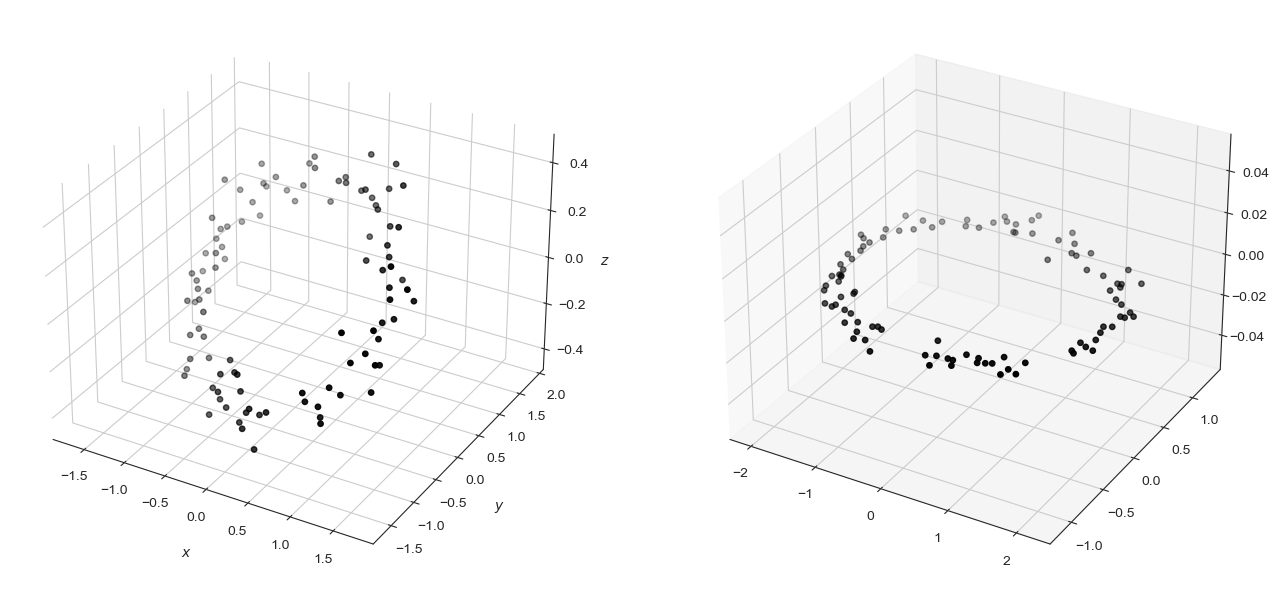

In [4]:

# PCA to reduce dimensions

pca2 = PCA(n_components=2)
projected_data  = pca2.fit_transform(data)

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(x, y, z, s=15, c='k')
format3D(ax1)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(*projected_data.T, s=15, c='k')
format3D(ax1)
fig.tight_layout()



/var/folders/24/xt77wc793jqdpnbccww3s7h00000gn/T/ipykernel_3246/1051447088.py:22: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  axis.w_xaxis.set_pane_color(transparent)
/var/folders/24/xt77wc793jqdpnbccww3s7h00000gn/T/ipykernel_3246/1051447088.py:23: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  axis.w_yaxis.set_pane_color(transparent)
/var/folders/24/xt77wc793jqdpnbccww3s7h00000gn/T/ipykernel_3246/1051447088.py:24: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  axis.w_zaxis.set_pane_color(transparent)


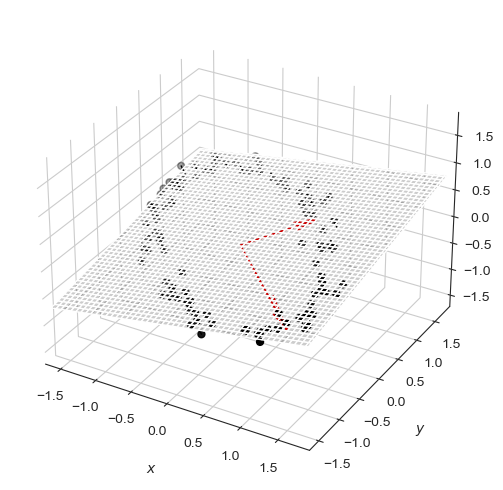

In [6]:
# Visualize 2D Projection

pca = PCA(n_components=2)
data_2D = pca.fit_transform(data)

min_, max_ = data[:, :2].min(), data[:, :2].max()
xs, ys = np.meshgrid(np.linspace(min_, max_, n_points), 
                     np.linspace(min_, max_, n_points))

normal_vector = np.cross(pca.components_[0], pca.components_[1])
d = -pca.mean_.dot(normal_vector)
zs = (-normal_vector[0] * xs - normal_vector[1] * ys - d) * 1 / normal_vector[2]

C = pca.components_.T.copy()
proj_matrix = C.dot(inv(C.T.dot(C))).dot(C.T)
C[:,0] *= 2

# Plotting - Adjusted to create a 3D subplot correctly
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xs, ys, zs, 
                alpha=0.2,
                color='k',
                linewidth=1, 
                antialiased=True)

ax.scatter(x, y, z, c='k', s=25)

for i in range(n_points):
    ax.plot(*zip(proj_matrix.dot(data[i]), data[i]), 
            color='k', lw=1)

origin = np.zeros((2, 3))
X, Y, Z, U, V, W = zip(*np.hstack((origin, C.T)))
ax.quiver(X, Y, Z, U, V, W, color='red')

format3D(ax, limits=list(repeat((min_, max_), 3)))
plt.tight_layout()



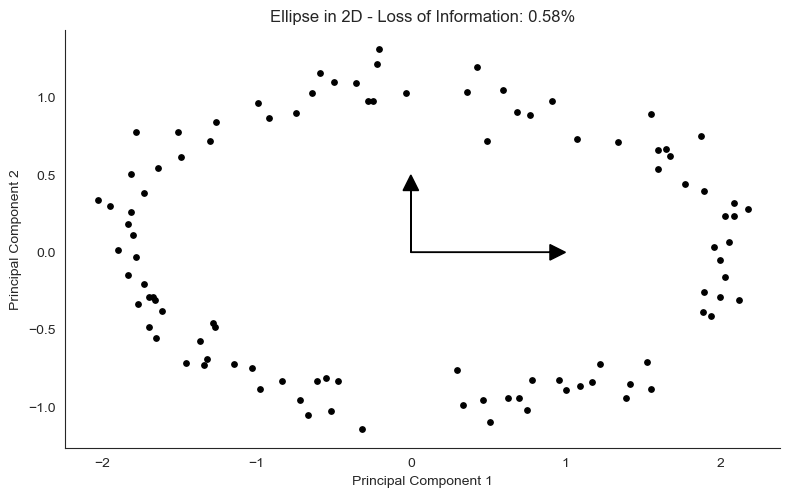

In [7]:
# 2D Representation

data_3D_inv = pca.inverse_transform(data_2D)
avg_error = np.mean(np.sum(np.square(data_3D_inv-data), axis=1))

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, aspect='equal',
                     xlabel='Principal Component 1',
                     ylabel='Principal Component 2',
                     title=f'Ellipse in 2D - Loss of Information: {avg_error:.2%}')

ax.scatter(data_2D[:, 0], data_2D[:, 1], color='k', s=15)
ax.arrow(0, 0, 0, .5, head_width=0.1, length_includes_head=True,
         head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.1, length_includes_head=True,
         head_length=0.1, fc='k', ec='k')
sns.despine()
fig.tight_layout()

